In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [2]:
all_tracks_df = pd.read_pickle("../../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except pop to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'pop', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

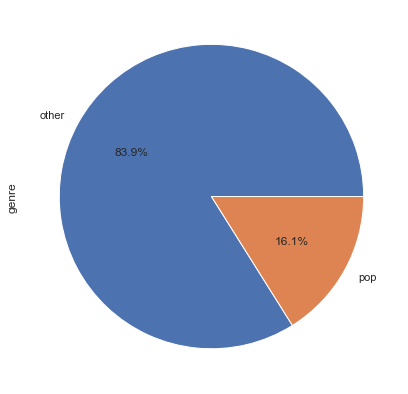

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other    5545
pop      1062
Name: genre, dtype: int64

Resample data

In [8]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'pop'].sample(n=1000, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=1000, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6epvwUINain4iSHCTWA0sj,pop,0.530369,0.363163,0.454545,0.815444,1.0,0.029661,0.536143,0.000000,0.118500,0.272860,0.472440,0.107075,0.75
0tTEImoPqWvU1SiOduW1iy,pop,0.690889,0.457435,0.636364,0.777932,1.0,0.021981,0.583332,0.267821,0.103998,0.295745,0.425331,0.143609,0.75
7mOcLhVf0Aj6pIfi3LcSNW,pop,0.502169,0.391244,0.363636,0.777484,1.0,0.049258,0.792168,0.000000,0.075927,0.124103,0.627112,0.072459,0.75
5szyU7UOFTE4lupMjbjbJj,pop,0.607375,0.764320,0.000000,0.856090,1.0,0.121822,0.028712,0.000000,0.533872,0.443462,0.579558,0.043189,0.75
0eqH0ALoDQevq59YcQ53KE,pop,0.938178,0.917763,0.909091,0.929770,0.0,0.186706,0.351403,0.000006,0.010151,0.915739,0.401640,0.077487,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3ii5VBrIXJXKEVkjx1IAdP,other,0.815618,0.491533,0.909091,0.757284,0.0,0.144597,0.241965,0.000047,0.070541,0.878290,0.336381,0.151761,0.75
41EYTKX66PslehSVrFdT4p,other,0.593275,0.799421,0.909091,0.849103,1.0,0.075742,0.086142,0.000000,0.068676,0.674399,0.769918,0.058864,0.75
7ewfvLrlI0VNht4vEnoTMh,other,0.434924,0.615892,0.000000,0.800752,0.0,0.345869,0.005449,0.000000,0.872592,0.333195,0.525999,0.151579,0.75
1WtTLtofvcjQM3sXSMkDdX,other,0.785249,0.498553,0.090909,0.823259,1.0,0.081833,0.002487,0.000001,0.217941,0.410174,0.603089,0.079173,0.75


<AxesSubplot:ylabel='genre'>

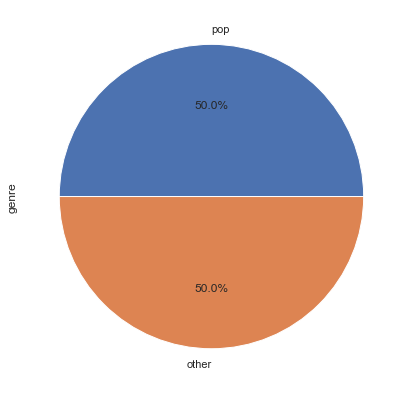

In [9]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [10]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.603619,0.603611,0.484182,0.802224,0.626500,0.168578,0.274654,0.080424,0.159817,0.480073,0.457027,0.104170,0.735750
std,0.180522,0.224791,0.324191,0.108852,0.483854,0.207452,0.303906,0.231149,0.130024,0.248078,0.170967,0.068758,0.085809
min,0.007267,0.003605,0.000000,0.137706,0.000000,0.002383,0.000018,0.000000,0.010151,0.000000,0.081480,0.000023,0.000000
25%,0.492408,0.467464,0.181818,0.777568,0.000000,0.040784,0.031171,0.000000,0.081624,0.287163,0.321604,0.065342,0.750000
50%,0.617137,0.637454,0.545455,0.832173,1.000000,0.076271,0.144575,0.000003,0.108660,0.479351,0.450974,0.091335,0.750000
75%,0.731291,0.778361,0.727273,0.865323,1.000000,0.197365,0.437247,0.001090,0.193340,0.673359,0.554999,0.125883,0.750000
max,1.000000,0.996991,1.000000,0.961391,1.000000,0.986758,1.000000,0.997963,0.910918,0.990638,1.000000,0.936444,1.000000


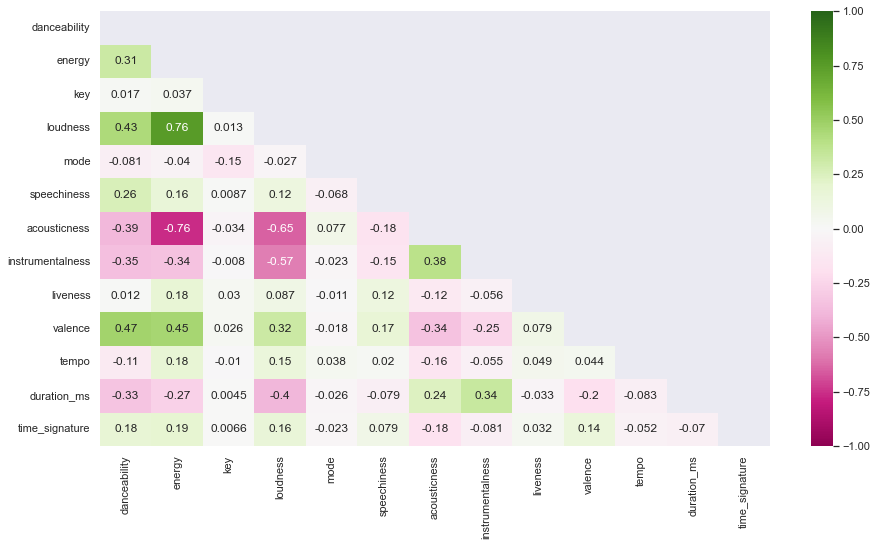

In [11]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

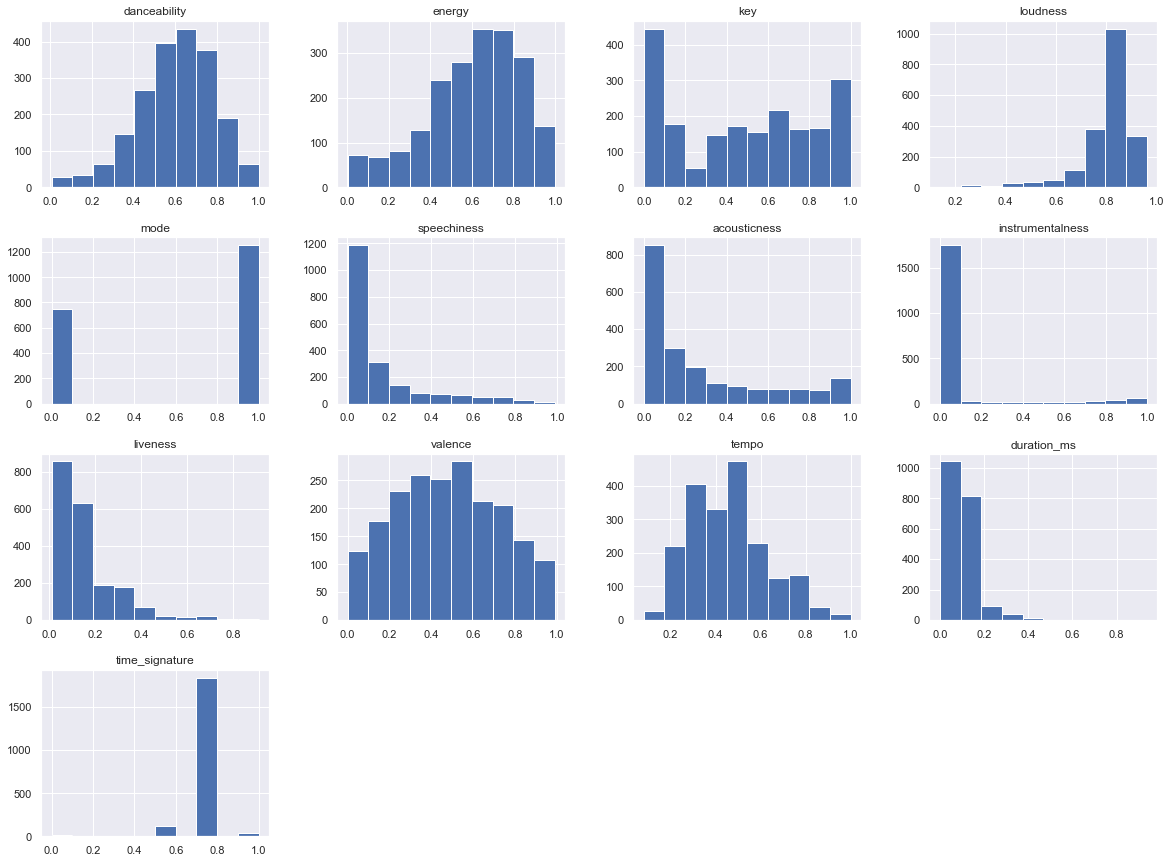

In [12]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [13]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [15]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


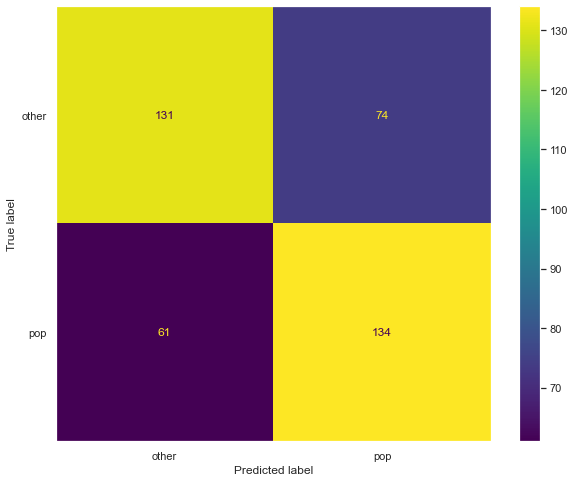

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [17]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

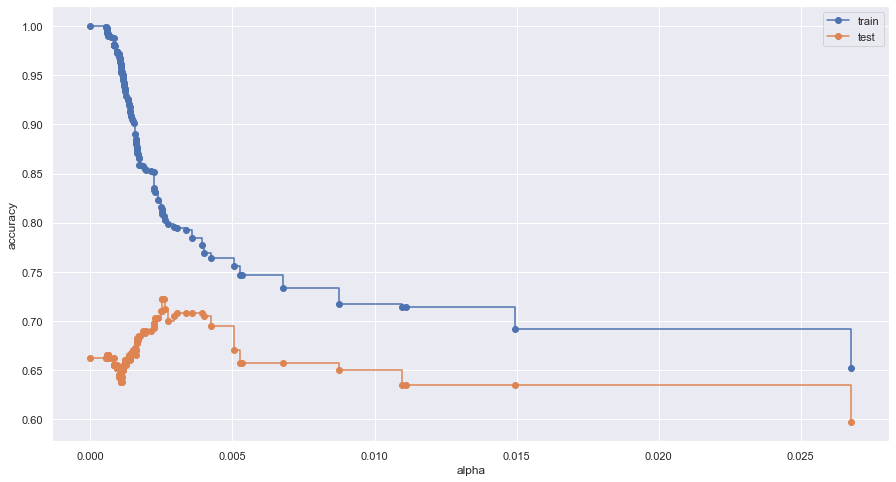

In [18]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [19]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.002527280477408354

Cross Validation

<AxesSubplot:xlabel='tree'>

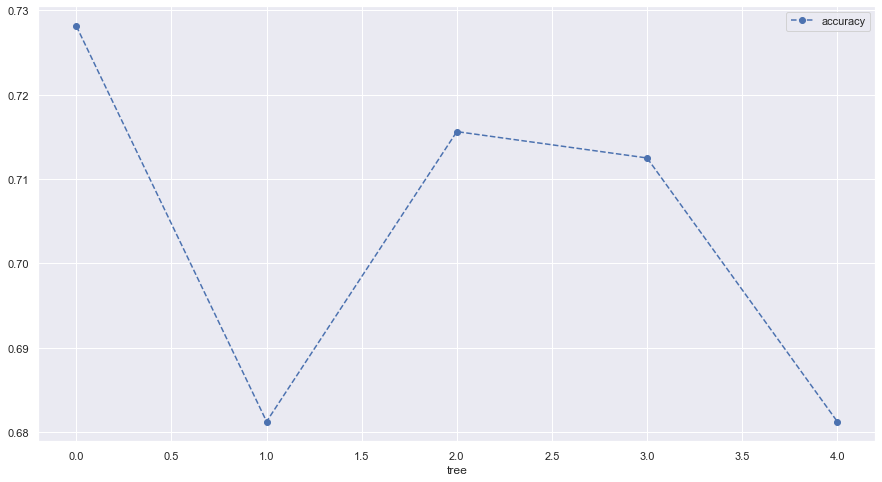

In [20]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

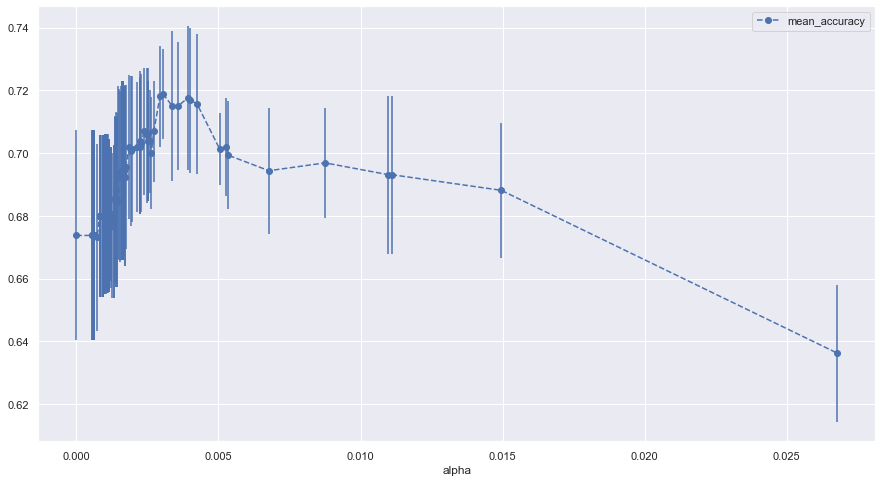

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [22]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.003055237542078499

Building final tree

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


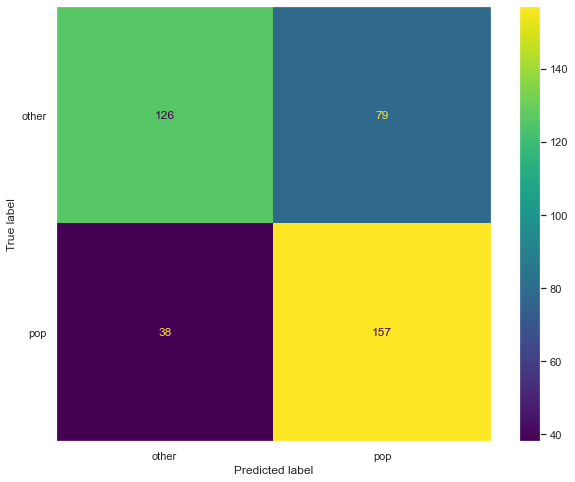

In [23]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

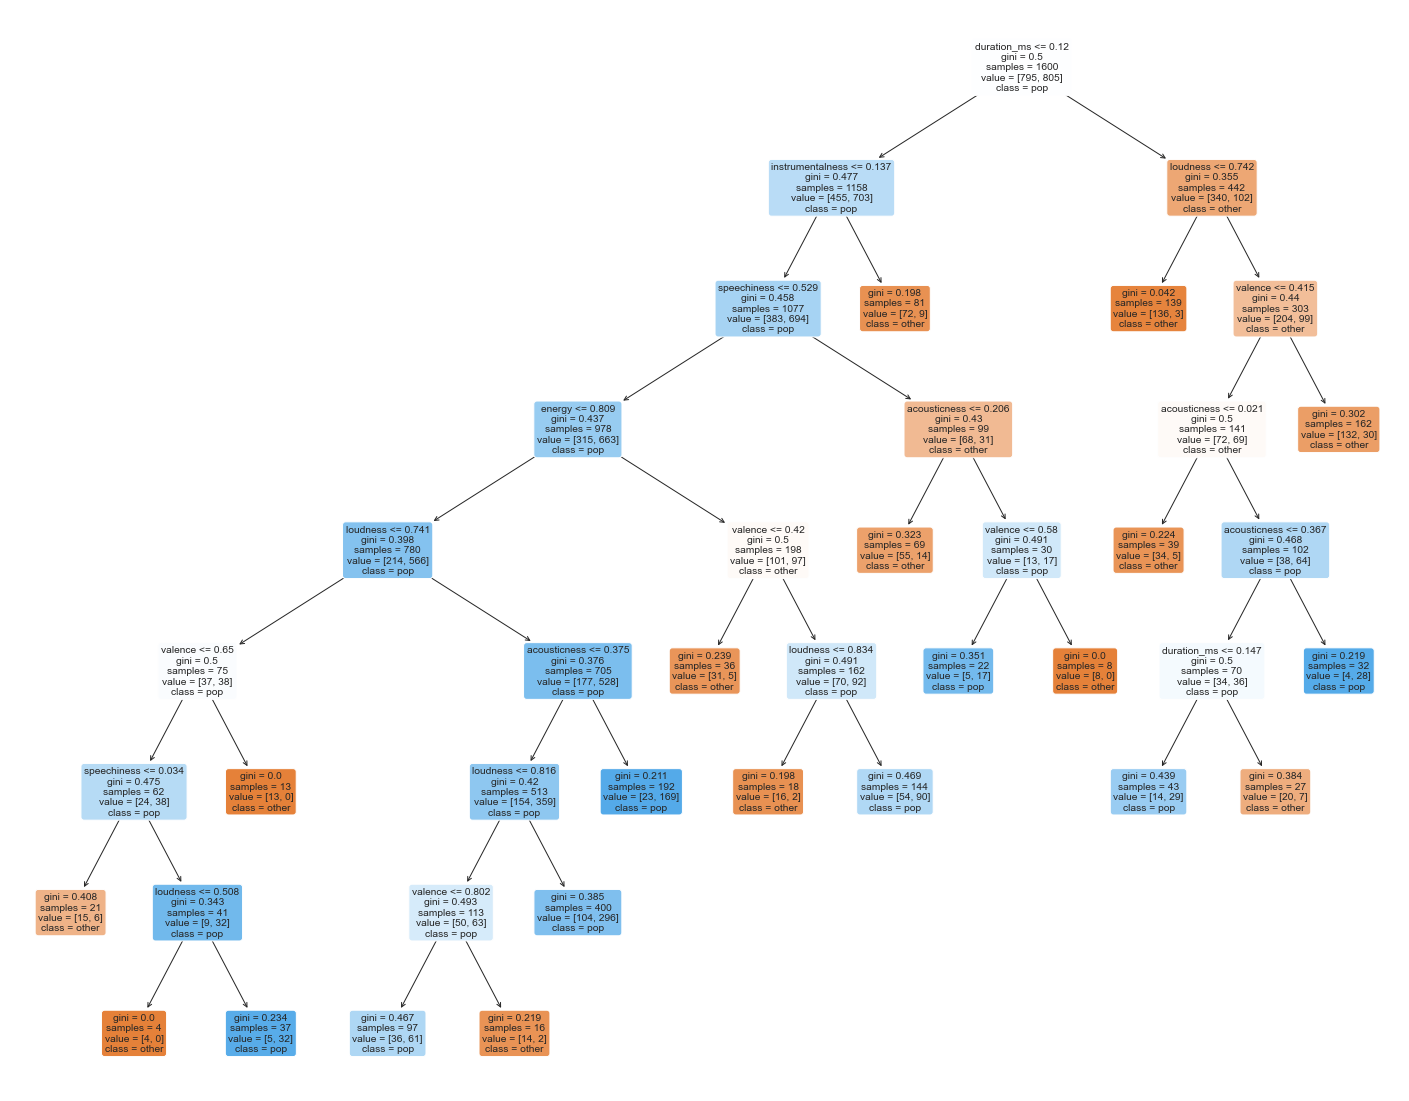

In [24]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [27]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'pop', 'genre'] = 0
df.loc[df['genre'] == 'pop', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=1000, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=1000, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6epvwUINain4iSHCTWA0sj,1,0.550,0.363,5,-7.326,1,0.0336,0.53400,0.000000,0.1280,0.286,121.940,230293,4
0tTEImoPqWvU1SiOduW1iy,1,0.698,0.457,7,-9.001,1,0.0307,0.58100,0.263000,0.1140,0.308,114.000,267880,4
7mOcLhVf0Aj6pIfi3LcSNW,1,0.524,0.391,4,-9.021,1,0.0410,0.78900,0.000000,0.0869,0.143,148.009,194680,4
5szyU7UOFTE4lupMjbjbJj,1,0.621,0.763,0,-5.511,1,0.0684,0.02860,0.000000,0.5290,0.450,139.994,164566,4
0eqH0ALoDQevq59YcQ53KE,1,0.926,0.916,10,-2.221,0,0.0929,0.35000,0.000006,0.0234,0.904,110.007,199853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3ii5VBrIXJXKEVkjx1IAdP,0,0.813,0.491,10,-9.923,0,0.0770,0.24100,0.000046,0.0817,0.868,99.008,276267,4
41EYTKX66PslehSVrFdT4p,0,0.608,0.798,10,-5.823,1,0.0510,0.08580,0.000000,0.0799,0.672,172.078,180693,4
7ewfvLrlI0VNht4vEnoTMh,0,0.462,0.615,0,-7.982,0,0.1530,0.00543,0.000000,0.8560,0.344,130.967,276080,4
1WtTLtofvcjQM3sXSMkDdX,0,0.785,0.498,1,-6.977,1,0.0533,0.00248,0.000001,0.2240,0.418,143.960,201587,4


In [28]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.525940
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.2412
Time:                        17:01:44   Log-Likelihood:                -841.50
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            nonrobust   LLR p-value:                7.796e-107
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         2.1936      0.462      4.751      0.000       1.289       3.099
energy              -2.5001      0.543     -4.606      0.000      -3.564      -1.436
key                 -0.0168      0.017     -1.002      0.316      -0.050       0.016
loudness             0.2560      0.030      8.605      0.000       0.198       0.314
mode                 0.1344      0.124      1.080      0.280      -0.110       0.378
speechiness         -4.8408      0.795     -6.090      0.000      -6.399      -3.283
acousticness         1.8680      0.324      5.762      0.000       1.233       2.503
instrumentalness    -3.6512      0.621     -5.876      0.000      -4.869      -2.433
liveness            -0.8931      0.495     -1.805      0.071      -1.863       0.077
valence             -1.2524      0.314     -3.985      0.000      -1.868      -0.636
tempo                0.0058      0.002      2.851      0.004       0.002       0.010
duration_ms      -1.028e-05    1.3e-06     -7.898      0.000   -1.28e-05   -7.73e-06
time_signature       1.1484      0.159      7.213      0.000       0.836       1.460
====================================================================================
"""